In [2]:
!pip install facenet_pytorch -i https://pypi.python.org/simple/

Looking in indexes: https://pypi.python.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import glob
import time
import torch
import cv2
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import skimage.io

# See github.com/timesler/facenet-pytorch:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Running on device: {device}')

Running on device: cpu


In [2]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
mtcnn = MTCNN(keep_all=True, device=device)

### one face

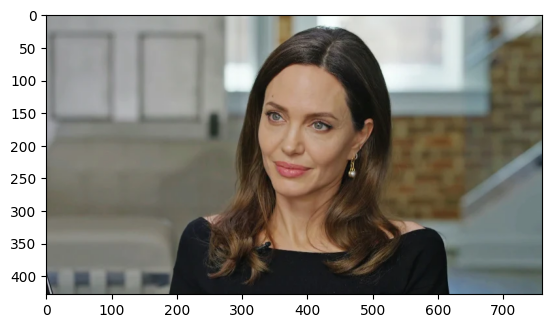

In [4]:
image = cv2.imread('./data/test_img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = Image.fromarray(image)
plt.imshow(img);

In [5]:
boxes, _ = mtcnn.detect(img)
boxes = boxes[0]

In [6]:
boxes

array([322.2824401855469, 78.70674133300781, 461.6004638671875,
       276.2201843261719], dtype=object)

In [7]:
def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[0], bb[1]), bb[2]-bb[0], bb[3]-bb[1], color=color,
                         fill=False, lw=3)

def show_corner_bb(im, bb):
    plt.imshow(im)
    plt.gca().add_patch(create_corner_rect(bb))

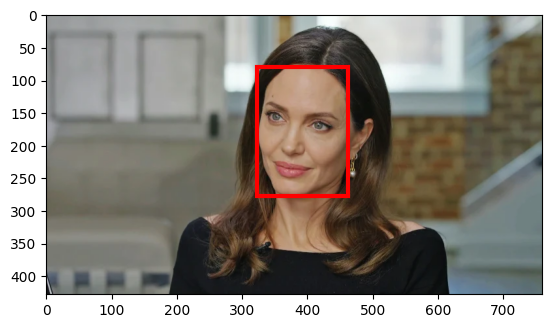

In [8]:
show_corner_bb(img, boxes)

In [9]:
boxes = np.array(boxes, dtype=np.float32)
x1 = int(boxes[1])
x2 = int(boxes[3])
y1 = int(boxes[0])
y2 = int(boxes[2])
crop_img = image[x1:x2,y1:y2:]

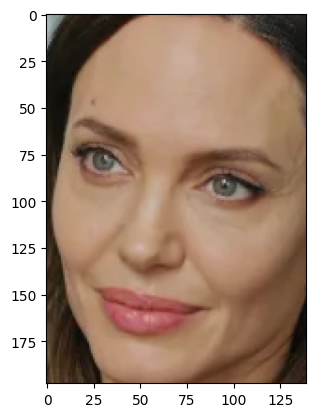

In [10]:
plt.imshow(crop_img);

In [11]:
crop_img.shape

(198, 139, 3)

### many faces

In [41]:
# put min_face_size=200 because else it found other faces on background
mtcnn = MTCNN(keep_all=True, device=device, min_face_size=200)

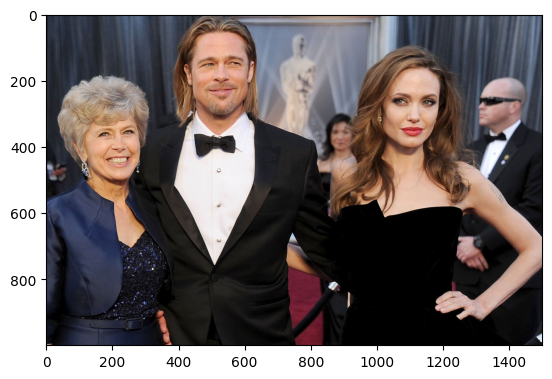

In [42]:
image = cv2.imread('./data/test_img2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = Image.fromarray(image)
plt.imshow(img);

In [43]:
boxes, _ = mtcnn.detect(img)
boxes = np.array(boxes, dtype=np.float32)

In [44]:
if boxes.shape:
    crop_image_list = []
    for box in boxes:  
        x1 = int(box[1])
        x2 = int(box[3])
        y1 = int(box[0])
        y2 = int(box[2])
        crop_img = image[x1:x2,y1:y2:]
        crop_image_list.append(crop_img)

(228, 171, 3)


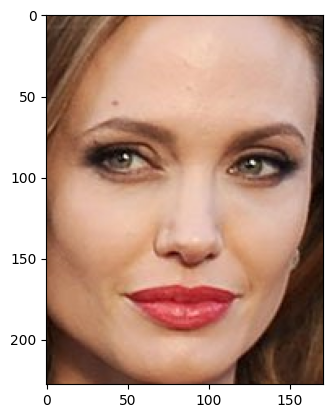

(232, 169, 3)


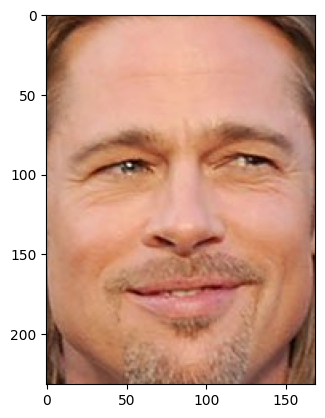

(210, 166, 3)


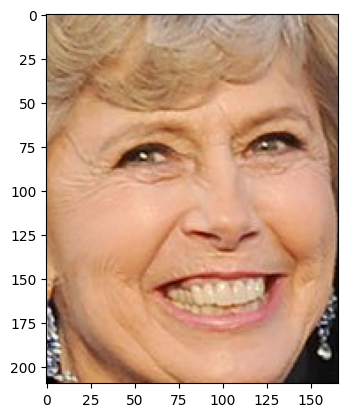

In [45]:
for crop_img in crop_image_list:
    print(crop_img.shape)
    plt.imshow(crop_img)
    plt.pause(0.001);